In [1]:
import os
import torch
import matplotlib.pyplot as plt
import numpy as np
from faceid_system import FaceIDSystem

In [2]:
data_dir = '/raid/data/pytorch_dataset/faceid/val/'

In [3]:
faceid_model = FaceIDSystem.load_from_checkpoint('lightning_logs/version_0/checkpoints/epoch=94.ckpt')

In [4]:
def get_embed(faceid_model, x):
    faceid_model.eval()
    mean = torch.tensor([0.5255, 0.5095, 0.4861, 0.7114]).view(4, 1, 1)
    std = torch.tensor([0.2075, 0.1959, 0.1678, 0.2599]).view(4, 1, 1)
    with torch.no_grad():
        x_tensor = torch.tensor(x).permute(2,0,1).float()
        x_tensor = (x_tensor - mean) / std
        embed = faceid_model.model(x_tensor.unsqueeze(0))
        return embed

In [5]:
def get_stat(faceid_model, x, x_pos, x_neg):
    cosine = torch.nn.CosineSimilarity()
    
    embed_x = get_embed(faceid_model, x)
    embed_x_pos = get_embed(faceid_model, x_pos)
    embed_x_neg = get_embed(faceid_model, x_neg)
    
    cosine_pos = round(cosine(embed_x, embed_x_pos).item(), 4)
    cosine_neg = round(cosine(embed_x, embed_x_neg).item(), 4)
    return cosine_pos, cosine_neg

In [15]:
def plot(faceid_model, x, x_pos, x_neg):
    
    cosine_pos, cosine_neg = get_stat(faceid_model, x, x_pos, x_neg)

    fig, axs = plt.subplots(2, 3)
    fig.set_size_inches(20, 10)
    
    axs[0, 0].imshow(x[:,:,:3]/255.0)
    axs[0, 0].set_title('Anker RGB')
    axs[1, 0].imshow(x[:,:,3]/255.0, cmap='RdYlBu')
    axs[1, 0].set_title('Anker Depth')
    
    axs[0, 1].imshow(x_pos[:,:,:3]/255.0)
    axs[0, 1].set_title('Cosine to anker: ' + str(cosine_pos))
    axs[1, 1].imshow(x_pos[:,:,3]/255.0, cmap='RdYlBu')
    axs[1, 1].set_title('X_Pos - Depth')
    
    axs[0, 2].imshow(x_neg[:,:,:3]/255.0)
    axs[0, 2].set_title('Cosine to anker: ' + str(cosine_neg))
    axs[1, 2].imshow(x_neg[:,:,3]/255.0, cmap='RdYlBu')
    axs[1, 2].set_title('X_Neg - Depth')
    
    for i in range(2):
        for j in range(3):
            axs[i,j].axis('off') 
    
    plt.show()

In [16]:
x = np.load(os.path.join(data_dir, 'person1_pose2.npy'))
x_pos = np.load(os.path.join(data_dir, 'person1_pose10.npy'))
x_neg = np.load(os.path.join(data_dir, 'person4_pose0.npy'))

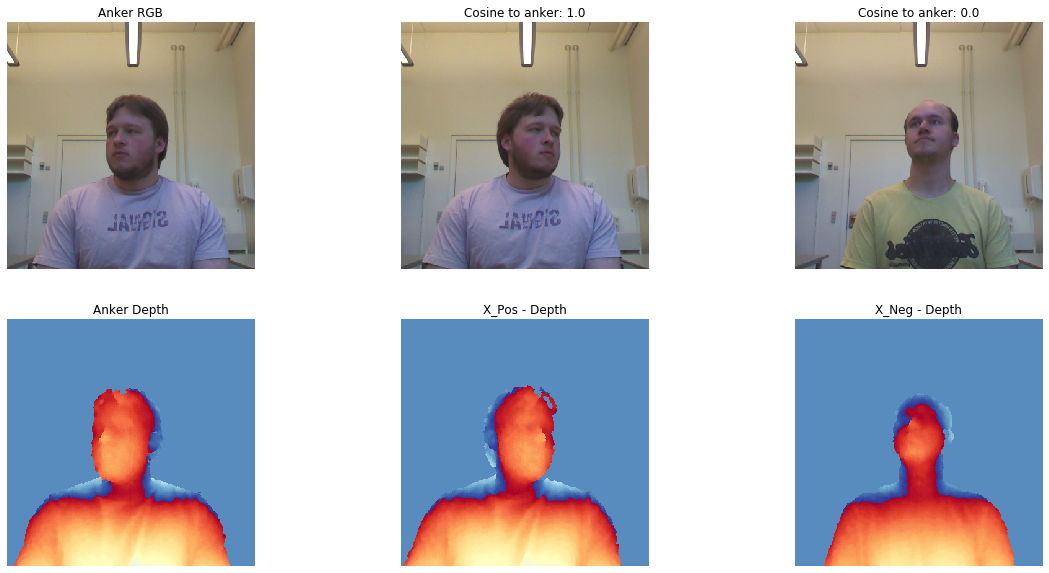

In [17]:
plot(faceid_model, x, x_pos, x_neg)